In [1]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
%matplotlib inline
from numpy.linalg import norm
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot
import pylab
from sklearn import linear_model

# Random  matrix (the off-diagonal from normal distrbution)


- We genrate random arreyes for the alpha's values. 

- We choose positive points for off_daigonal.

- We set the diagonal to 1.

- Our model is commpetition interaction so all the elelment of our matrix becomes (-). 

- We used this matrix as system of equations and we solve it to find the fixed points.

- From the fixed points  we choose the positve points.


In [2]:
counter = 100
n=2   #the size of the matrix
solution =[]
alpha_matrix = []
b = np.ones(n)
i=0
while len(solution)< counter:
    A1=np.random.normal(0,0.5, n**2)#The mean of the varuable is 0 and std = 1
    #print(A1)         #random array
    A1 = A1.reshape(n,n) #reshape to matrix
    A1[np.diag_indices_from(A1)]=1
    if np.all(A1>0):
        N=np.linalg.solve(A1 ,b) #solve the system of the linear equations to get the fixed points
        if np.all(N>0):
            alpha_matrix.append(A1)
            solution.append(N)
    i+=1
print(A1)
print (len(solution)) 
print(len(alpha_matrix))
print ("Out of the ", i," random matrices only",len(alpha_matrix)," satisfy all the conditions.")

[[ 1.          0.27367271]
 [ 0.58302063  1.        ]]
100
100
Out of the  416  random matrices only 100  satisfy all the conditions.


## The matrices that have been used:
#### 1- alpha matrix.
#### 2- Jacobain matrix.
#### 3- Encounter matrix.
#### 4- Competition matrix.

In [3]:
for i in range(len(alpha_matrix)):
    alpha_matrix[i] = -alpha_matrix[i]
    m = alpha_matrix
#print(m[0])
    
alpha=[]
for k in range(len(alpha_matrix)):
    lam=LA.eigvals(alpha_matrix[k])
    M=max(lam.real)
    #print(M)
    alpha.append(M)
#print(len(MM))
#print(alpha_matrix[0])
#print(solution)
neg = []
for n in range (len(alpha)):
    if alpha[n]<0:
        neg.append(alpha[n])
#print(min(neg))
print(",,,,,,,")
print("the nev Evalue of Alpha matrix = " ,len(neg))
print(min(alpha),max(alpha))    


rate = [1,1]
#rate = [0.1,0.1]
#rate = [0.5,0.5]
Jacobian  = []
for i in range(0,len(solution)):
    for j in range(1):
        alpha11 = alpha_matrix[i][j][0]
        alpha12 = alpha_matrix[i][j-1][0]
        alpha22 = alpha_matrix[i-1][j][1]
        alpha21 = alpha_matrix[i-1][j-1][1]
        #N1 = (alpha12 - 1 )/(alpha21*alpha12 - 1)
        #N2 = (alpha21 - 1 )/(alpha21*alpha12 - 1)

        Jacobian1 = [[2*rate[0]*alpha11*solution[i][0]+rate[0]*(1+alpha12*solution[i][1]),rate[0]*alpha12*solution[i][0]],
                     [rate[1]*alpha21*solution[i][1],2*rate[1]*alpha22*solution[i][1]+rate[1]*(1+alpha21*solution[i][0])]]
        Jacobian.append(Jacobian1)
        #print(Jacobian)
        #Eigen = LA.eigvals(Jacobian) # the eigenvalues of the Jacobain matrix
        #print(Eigen)

Jaco=[]
for k in range(len(Jacobian)):
        lam=LA.eigvals(Jacobian[k])
        Max_real_point=max(lam.real)
        #print(M)
        Jaco.append(Max_real_point)
        #print(Max_real_point)
#print(len(MMa))
y=np.zeros(len(Jaco))
#plt.title("Eigenvalues domian for the Jacobian matrix")
#plt.plot(Jaco,y,'*g')
#print(len(Jacobian))

negv = []
for n in range (len(Jaco)):
    if Jaco[n]<0:
        negv.append(Jaco[n])
print(",,,,,,,")
print("the nev Evalue of Jacobian matrix = " ,len(negv))
print(min(Jaco),max(Jaco))   


Encounter = []
for i in range(0,len(solution)):
    N1N1 = solution[i][0]**2
    N1N2 = solution[i][0]*solution[i][1]
    N2N2 = solution[i][1]**2
    #N1 = (alpha12 - 1 )/(alpha21*alpha12 - 1)
    #N2 = (alpha21 - 1 )/(alpha21*alpha12 - 1)
    Encounter1 = [[-N1N1 ,  -N1N2],
                [ -N1N2 , -N2N2]]
    Encounter.append(Encounter1)
#print(Encounter)

Encount=[]
#for k in range(len(Encounter)):
for n in range(len(Encounter)):
    Eigenvalue = LA.eigvals(Encounter) # the eigenvalues of the Jacobain matrix
    Maxx_real = max(Eigenvalue[n].real)
    Encount.append(Maxx_real)
#print(len(mmax))
y=np.zeros(len(Encount))
#plt.title("Eigenvalues domian for the Encounter matrix")
#plt.plot(Encount,y,'*g')
#print(len(Jacobian))

nege = []
for n in range (len(Encount)):
    if Encount[n]<0:
        nege.append(Encount)
print(",,,,,,,")
print("the nev Evalue of Encounter matrix = " ,len(nege))
print(min(Encount),max(Encount))   


com = []
for i in range(0,len(solution)):
    N1N1 = solution[i][0]**2
    N1N2 = solution[i][0]*solution[i][1]
    N2N2 = solution[i][1]**2
    for i in range(0,len(solution)):
        for j in range(1):
            alpha11 = alpha_matrix[i][j][0]
            alpha12 = alpha_matrix[i][j-1][0]
            alpha22 = alpha_matrix[i-1][j][1]
            alpha21 = alpha_matrix[i-1][j-1][1]
        #N1 = (alpha12 - 1 )/(alpha21*alpha12 - 1)
    #N2 = (alpha21 - 1 )/(alpha21*alpha12 - 1)
    com1 = [[alpha11*N1N1 ,  alpha12*N1N2],
                [ alpha21*N1N2 , alpha22*N2N2]]
    com.append(com1)
#print(Encounter)

Com=[]
#for k in range(len(Encounter)):
for n in range(len(com)):
    Eigenvalu = LA.eigvals(com) # the eigenvalues of the Jacobain matrix
    Maxx_reeal = max(Eigenvalu[n].real)
    Com.append(Maxx_reeal)
#print(len(mmaxCom))
y=np.zeros(len(Com))
#plt.title("Eigenvalues domian for the Encounter matrix")
#plt.plot(Com,y,'*g')
#print(len(Jacobian))

negev = []
for n in range (len(Com)):
    if Com[n]<0:
        negev.append(Com)
print(",,,,,,,")        
print("the nev Evalue of Com matrix = " ,len(negev))
print(min(Com),max(Com))      
        

,,,,,,,
the nev Evalue of Alpha matrix =  99
-0.967477174268 0.321622686392
,,,,,,,
the nev Evalue of Jacobian matrix =  48
-0.932047447034 0.879039052281
,,,,,,,
the nev Evalue of Encounter matrix =  22
-1.11022302463e-16 2.22044604925e-16
,,,,,,,
the nev Evalue of Com matrix =  0
0.000702525924452 0.374515114153


In [16]:
Encounter = []
for i in range(0,len(solution)):
    N1N1 = solution[i][0]**2
    N1N2 = solution[i][0]*solution[i][1]
    N2N2 = solution[i][1]**2
    #N1 = (alpha12 - 1 )/(alpha21*alpha12 - 1)
    #N2 = (alpha21 - 1 )/(alpha21*alpha12 - 1)
    Encounter1 = [[-N1N1 ,  -N1N2],
                [ -N1N2 , -N2N2]]
    Encounter.append(Encounter1)
#print(Encounter)

Encount=[]
#for k in range(len(Encounter)):
for n in range(len(Encounter)):
    Eigenvalue = LA.eigvals(Encounter) # the eigenvalues of the Jacobain matrix
    Maxx_real = max(Eigenvalue[n].real)
    Encount.append(Maxx_real)
#print(len(mmax))
print(Encounter[0][0][0]*Encounter[0][1][1]-Encounter[0][0][1]*Encounter[0][1][0])

2.77555756156e-17


In [14]:
Encounter[1][1]

[-0.79918684839631615, -0.73086362335063615]

## Box and violin plot

/usr/local/lib/python3.4/dist-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


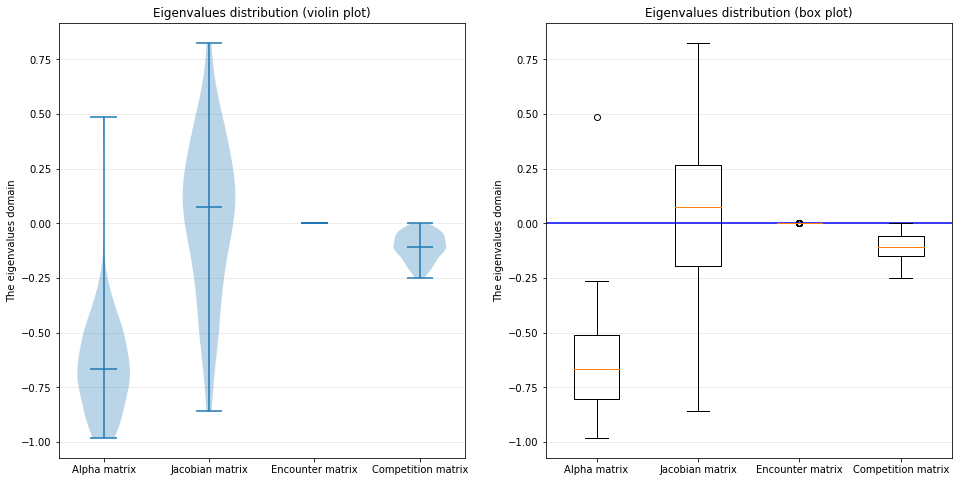

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,8))
# our data set
all_data = [alpha,Jaco,Encount,Com]

# the violin plot
axes[0].violinplot(all_data,
                   showmeans=False,
                   showmedians=True)
plt.legend(loc=2)
z = np.arange(0,100)
y=np.zeros(len(alpha))
plt.plot(z,y,'-b')
axes[0].set_title('Eigenvalues distribution (violin plot)')
axes[0].set_axisbelow(True)
axes[0].yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)
axes[0].set_ylabel('The eigenvalues domain')

# the box plot
axes[1].boxplot(all_data)
axes[1].set_title('Eigenvalues distribution (box plot)')

# adding horizontal grid lines
for ax in axes:
    ax.yaxis.grid(True)
    ax.set_xticks([y+1 for y in range(len(all_data))])
    #ax.set_xlabel('xlabel')
    #ax.set_ylabel('ylabel')
plt.setp(axes, xticks=[y+1 for y in range(len(all_data))],
         xticklabels=['Alpha matrix', 'Jacobian matrix', 'Encounter matrix', 'Competition matrix'])
#yticklabels=['']
ax.set_axisbelow(True)
ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)
ax.set_ylabel('The eigenvalues domain')
plt.show()

In [10]:
h = [1,10,11,12,13,14,15]
e = np.mean(h)
u =np.median(h)
print(e,u)

10.8571428571 12.0


## The correlation graph

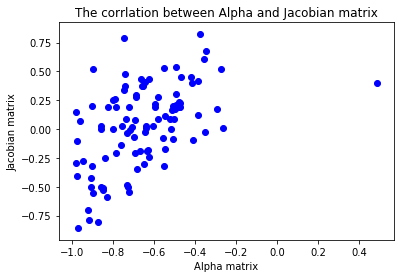

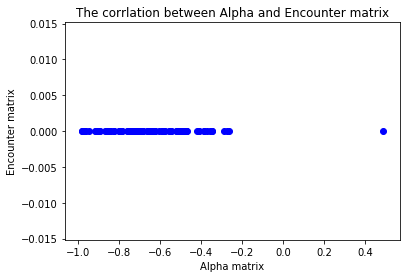

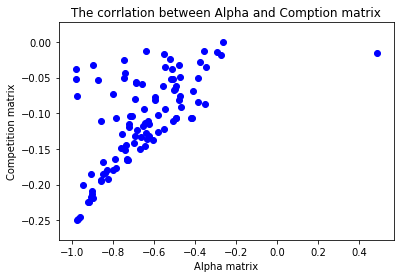

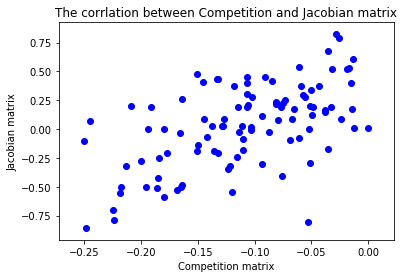

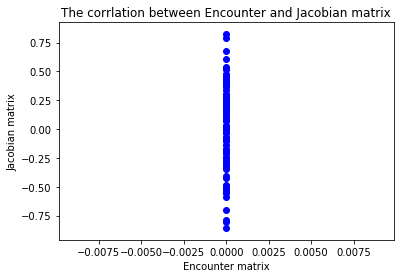

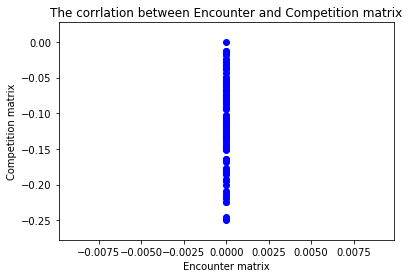

In [11]:
# the data set
all_data = [alpha,Jaco,Encount,Com]


x1 = [alpha]
y1 = [Jaco]

x2 = [alpha]
y2 = [Encount]

x3 = [alpha]
y3 = [Com]

x4 = [Com]
y4 = [Jaco]

x5 = [Encount]
y5 = [Jaco]

x6 = [Encount]
y6 = [Com]


for i in range(len(x1)):
    plt.scatter(x1[i], y1[i], c = 'blue')
plt.title('The corrlation between Alpha and Jacobian matrix')
plt.xlabel('Alpha matrix')
plt.ylabel('Jacobian matrix')
plt.show()

for k in range(len(x2)):
     plt.scatter(x2[k], y2[k], c = 'blue')   
plt.title('The corrlation between Alpha and Encounter matrix')
plt.xlabel('Alpha matrix')
plt.ylabel('Encounter matrix')
plt.show()

 
for n in range(len(x3)):
     plt.scatter(x3[n], y3[n], c = 'blue')   
plt.title('The corrlation between Alpha and Comption matrix')
plt.xlabel('Alpha matrix')
plt.ylabel('Competition matrix')
plt.show()
 
for ki in range(len(x4)):
     plt.scatter(x4[ki], y4[ki], c = 'blue')   
plt.title('The corrlation between Competition and Jacobian matrix')
plt.xlabel('Competition matrix')
plt.ylabel('Jacobian matrix')
plt.show()

for o in range(len(x5)):
     plt.scatter(x5[o], y5[o], c='b')   
plt.title('The corrlation between Encounter and Jacobian matrix')
plt.xlabel('Encounter matrix')
plt.ylabel('Jacobian matrix')
plt.show()

for ke in range(len(x6)):
     plt.scatter(x6[ke], y6[ke], c = 'blue')   
plt.title('The corrlation between Encounter and Competition matrix')
plt.xlabel('Encounter matrix')
plt.ylabel('Competition matrix')
plt.show()



### t-test calculations 

In [12]:
l = [alpha,Jaco,Encount,Com]
m = []
for i in range(len(l)):
    meanl1 = sum(l[i])/len(l[i]) #copute the mean for all variablees
    m.append(meanl1)
print(m)

sigma1 = 0   
for j in range(len(alpha)):
    sigma1 += (alpha[j]-m[0])**2 #standard divation for the alpha matrix
s1 = sigma1/(len(alpha)-1)
#print(s1)
print("STD for alpha matrix = ",sigma1)

sigma2 = 0   
for j in range(len(Jaco)):
    sigma2 += (Jaco[j]-m[1])**2 #standard divation for the  Jacobian matrix
s2 = sigma2/(len(Jaco)-1)
#print(s2)
print("STD for Jacobian matrix = ",sigma2 )

sigma3 = 0   
for j in range(len(Encount)):
    sigma3 += (Encount[j]-m[2])**2 #standard divation for the encounter matrix
s3 = sigma3/(len(Encount)-1)
#print(s3)
print("STD for Encounter matrix = ",sigma3 )

sigma4 = 0   
for j in range(len(Com)):
    sigma4 += (Com[j]-m[0])**2 #standard divation for the commpetition matrix
s4 = sigma4/(len(Com)-1)
#print(s4)
print("STD for commpetition matrix = ",sigma4 )

            #standard error for all pairs of the matrices

SE1 = (s1/100+s2/100)**(1/2)  
print("SE for alpha and Jacobian matrix  = ",SE1)


SE2 = (s1/100+s3/100)**(1/2)
print("SE for alpha and Encounter matrix = ",SE2)


SE3 = (s1/100+s4/100)**(1/2)
print("SE for alpha and Encounter matrix = ",SE3)



SE4 = (s2/100+s3/100)**(1/2)
print("SE for Jacobian and Encounter matrix = ", SE4 )

SE5 = (s2/100+s4/100)**(1/2)
print("SE for Jacobian and competition matrix = ",SE5)

SE6 = (s3/100+s4/100)**(1/2)
print("SE for encounter and competition matrix= ",SE6)

[-0.65451617160654973, 0.030912504469868089, -4.5108231386259409e-18, -0.1096036915565371]
STD for alpha matrix =  4.61252342238
STD for Jacobian matrix =  12.8085824721
STD for Encounter matrix =  4.09777220759e-31
STD for commpetition matrix =  30.0857314537
SE for alpha and Jacobian matrix  =  0.0419488696642
SE for alpha and Encounter matrix =  0.0215849822054
SE for alpha and Encounter matrix =  0.0592019782601
SE for Jacobian and Encounter matrix =  0.0359693787728
SE for Jacobian and competition matrix =  0.0658236962074
SE for encounter and competition matrix=  0.0551267881624


In [13]:
l = [alpha,Jaco,Encount,Com]
t1 = (m[0] - m[1])/SE1
t2 = (m[0] - m[2])/SE2
t3 = (m[0] - m[3])/SE3
t4 = (m[3] - m[1])/SE4
t5 = (m[2] - m[1])/SE5
t6 = (m[3] - m[2])/SE6
print("t-test value of the Alpha and Jacobian = " , t1)
print("t-test value of the Alpha and encounter = " , t2)
print("t-test value of the Alpha and competition = " , t3)
print("t-test value of the competition and Jacobian = " , t4)
print("t-test value of the encounter and Jacobian = " , t5)
print("t-test value of the encounter and competition = " , t6)

t-test value of the Alpha and Jacobian =  -16.3396220581
t-test value of the Alpha and encounter =  -30.3227570623
t-test value of the Alpha and competition =  -9.20429512771
t-test value of the competition and Jacobian =  -3.90655053884
t-test value of the encounter and Jacobian =  -0.469625776901
t-test value of the encounter and competition =  -1.98821108956


In [15]:
#degree of freedom
d1 = (s1/100+s2/100)**2 / (((s1/100)**2)*(1/99)+(s2/100)**2*(1/99))
d2 = (s1/100+s3/100)**2 / (((s1/100)**2)*(1/99)+(s3/100)**2*(1/99))
d3 = (s1/100+s4/100)**2 / (((s1/100)**2)*(1/99)+(s4/100)**2*(1/99))
d4 = (s2/100+s3/100)**2 / (((s2/100)**2)*(1/99)+(s3/100)**2*(1/99))
d5 = (s2/100+s4/100)**2 / (((s2/100)**2)*(1/99)+(s4/100)**2*(1/99))
d6 = (s3/100+s4/100)**2 / (((s3/100)**2)*(1/99)+(s4/100)**2*(1/99))
print(d1)
print(d2)
print(d3)
print(d4)
print(d5)
print(d6)

162.117099482
99.0
128.658783157
99.0
170.361407424
99.0


/usr/local/lib/python3.4/dist-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


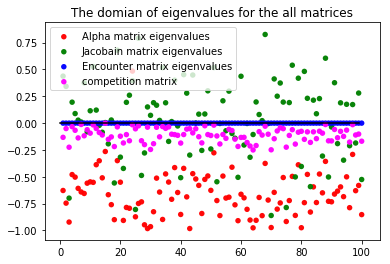

In [16]:
x = np.arange(1,101)
data = ((alpha,x),(Jaco,x),(Encount,x),(Com,x))
colors = ("red", "green", "blue" , "magenta")
groups = ("Alpha matrix eigenvalues", "Jacobain matrix eigenvalues", "Encounter matrix eigenvalues","competition matrix") 
 
# Create plot
fig = plt.figure()
ax = fig.add_subplot(1,1,1, axisbg="1.0")
 
for data, color, group in zip(data, colors, groups):
    x,y = data
    ax.scatter(y,x, alpha=10, c=color, edgecolors='none', s=30,label = group)
 
    #plt.title('Matplot scatter plot')
plt.legend(loc=2)
z = np.arange(0,100)
y=np.zeros(len(alpha))
plt.title("The domian of eigenvalues for the all matrices")
plt.plot(z,y,'-k')
#print(len(Jacobian))

#plt.label(group)
plt.show()